In [1]:
import scipy.io


In [2]:
# pip install mat73


In [3]:
import mat73

# Load the .mat file
data = mat73.loadmat('/Users/gc3045/laml2_experiments/BaseMEM_Magic/Magic/Figures3_5_and_SupFigures2_4-6/all_position_summary_workspace.mat')


ERROR:root:ERROR: MATLAB type not supported: classreg.learning.partition.ClassificationPartitionedECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)
ERROR:root:ERROR: MATLAB type not supported: ClassificationECOC, (uint32)

In [4]:
data.keys()

dict_keys(['CVMdl', 'Mdl_all_together', 'Mdl_array', 'PCA_mRNA', 'Posterior_array', 'Posterior_array_all_together', 'all_annotated_subsets', 'all_manual_classifications', 'all_positions_array', 'annotated_subset_array', 'ans', 'b', 'barcode_dist_freqs', 'barcode_dists', 'bc_whitelist', 'cell_assignments', 'cell_mask_array', 'cell_pos_dot_labels', 'cell_pos_dot_labels_nofilt', 'cell_pos_labels', 'cell_pos_sBC_labels', 'cell_pos_sBC_labels_nofilt', 'cells_list', 'class_fractions_all', 'class_fractions_dynamic', 'class_fractions_static', 'class_labs', 'class_labs_all_together', 'colors', 'confmat', 'ctr', 'curr_cell', 'curr_cell_mask', 'curr_dots_masked', 'curr_mask', 'd', 'dot_count', 'dot_pos_labels', 'dynamic_bc_calls', 'explained', 'final_bcs', 'final_bcs_dists', 'final_bcs_filt', 'final_bcs_fives', 'final_bcs_nofilt', 'final_consensus_array', 'final_dot_matrix', 'final_dot_matrix_probs', 'first_cell_measures', 'gene', 'gene_idx', 'hBar', 'i', 'idx', 'int_bc_freqs', 'j', 'joint_bc_fre

In [5]:
data['all_annotated_subsets'].shape

(9598, 24)

In [6]:
data['all_manual_classifications'].shape

(9598,)

In [7]:
data['all_annotated_subsets']

array([[1.000e+00, 1.690e+02, 5.000e+00, ..., 4.400e+01, 2.200e+01,
        4.400e+01],
       [1.000e+00, 2.890e+02, 9.000e+00, ..., 3.500e+01, 5.700e+01,
        5.700e+01],
       [1.000e+00, 6.840e+02, 2.000e+01, ..., 3.400e+01, 8.000e+00,
        8.000e+00],
       ...,
       [1.600e+01, 1.293e+03, 1.700e+01, ..., 7.500e+01, 7.500e+01,
        6.200e+01],
       [1.600e+01, 1.306e+03, 1.700e+01, ..., 2.500e+01, 2.000e+00,
        2.600e+01],
       [1.600e+01, 1.355e+03, 1.600e+01, ..., 5.700e+01, 2.900e+01,
        5.700e+01]])

In [8]:
import numpy as np

np.unique(data['all_manual_classifications'])

array([1., 2., 3., 4.])

In [9]:
data['all_annotated_subsets'].shape

(9598, 24)

In [10]:
data['tidy_dots_filt_array_all'].shape

(392864, 24)

In [11]:
data['all_annotated_subsets'][:, 4:20].shape

(9598, 16)

In [12]:
training_intensities = data['all_annotated_subsets'][:,4:20]
training_labels = data['all_manual_classifications']


In [13]:
training_intensities.shape, training_labels.shape

((9598, 16), (9598,))

1. Perform KDE on each class (1-4).
2. Extract the observed intensity vector for every cell, at every position. 
3. Compute the generative conditional probability P(observed intensity vector | nucleotide). Do this shared for every cell and every site and every integration for now.

In [14]:
training_labels.shape, training_intensities.shape

((9598,), (9598, 16))

In [15]:
unique_labels = np.unique(training_labels)
print(unique_labels)
training_classes = dict()
# Loop through each unique label and plot the corresponding intensities
for label in unique_labels:
    
    # Get indices for the current label
    indices = np.where(training_labels == label)
    
    # Plot the corresponding intensities
    training_classes[label] = training_intensities[indices, :][0]
    
    

[1. 2. 3. 4.]


In [16]:
for x in training_classes.keys():
    print(training_classes[x].shape)

(2067, 16)
(3658, 16)
(1748, 16)
(2125, 16)


In [17]:
training_classes[1]

array([[ 8.74305305,  5.31320598,  8.05706068, ...,  5.11258108,
         9.90487971,  4.64700867],
       [12.63203295,  8.61956926,  7.19593723, ...,  8.82136757,
         5.98120375,  7.02753858],
       [ 9.06935268,  5.52942909,  6.42810527, ...,  4.32943565,
         6.0634555 ,  4.46756152],
       ...,
       [12.53388607,  7.94129557,  8.13182479, ...,  6.9610566 ,
         8.37234548, 10.75832622],
       [ 9.52369019,  5.26269019,  7.03085748, ...,  3.61650695,
         6.73378097,  6.43846742],
       [10.97507117,  6.49072353,  9.58706301, ...,  5.35912183,
        11.00743509, 10.49570816]])

In [21]:
from sklearn.neighbors import KernelDensity

# # Create and fit the KDE model
# kde_class1 = KernelDensity(bandwidth=1.0, kernel='gaussian')
# kde_class1.fit(training_classes[1])

# kde_class2 = KernelDensity(bandwidth=1.0, kernel='gaussian')
# kde_class2.fit(training_classes[2])

# kde_class3 = KernelDensity(bandwidth=1.0, kernel='gaussian')
# kde_class3.fit(training_classes[3])

# kde_class4 = KernelDensity(bandwidth=1.0, kernel='gaussian')
# kde_class4.fit(training_classes[4])

In [22]:
from sklearn.model_selection import GridSearchCV

kde_dict = dict()
for val in [1, 2, 3, 4]:
    params = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), params)
    grid.fit(training_classes[val])

    # controls the smoothness of the density estimate
    print("Best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
    kde = grid.best_estimator_
    kde_dict[val] = kde

Best bandwidth: 0.5455594781168519
Best bandwidth: 0.42813323987193935
Best bandwidth: 0.5455594781168519
Best bandwidth: 0.5455594781168519


Extract the intensity feature vector, the cassette index, and the barcode of each cell

In [23]:
data.keys()

dict_keys(['CVMdl', 'Mdl_all_together', 'Mdl_array', 'PCA_mRNA', 'Posterior_array', 'Posterior_array_all_together', 'all_annotated_subsets', 'all_manual_classifications', 'all_positions_array', 'annotated_subset_array', 'ans', 'b', 'barcode_dist_freqs', 'barcode_dists', 'bc_whitelist', 'cell_assignments', 'cell_mask_array', 'cell_pos_dot_labels', 'cell_pos_dot_labels_nofilt', 'cell_pos_labels', 'cell_pos_sBC_labels', 'cell_pos_sBC_labels_nofilt', 'cells_list', 'class_fractions_all', 'class_fractions_dynamic', 'class_fractions_static', 'class_labs', 'class_labs_all_together', 'colors', 'confmat', 'ctr', 'curr_cell', 'curr_cell_mask', 'curr_dots_masked', 'curr_mask', 'd', 'dot_count', 'dot_pos_labels', 'dynamic_bc_calls', 'explained', 'final_bcs', 'final_bcs_dists', 'final_bcs_filt', 'final_bcs_fives', 'final_bcs_nofilt', 'final_consensus_array', 'final_dot_matrix', 'final_dot_matrix_probs', 'first_cell_measures', 'gene', 'gene_idx', 'hBar', 'i', 'idx', 'int_bc_freqs', 'j', 'joint_bc_fre

In [24]:
non_empty_keys = [key for key in data.keys() if data[key] is not None]

In [25]:
non_empty_keys

['Mdl_array',
 'PCA_mRNA',
 'Posterior_array',
 'Posterior_array_all_together',
 'all_annotated_subsets',
 'all_manual_classifications',
 'all_positions_array',
 'annotated_subset_array',
 'barcode_dist_freqs',
 'barcode_dists',
 'cell_assignments',
 'cell_mask_array',
 'cells_list',
 'class_fractions_all',
 'class_fractions_dynamic',
 'class_fractions_static',
 'class_labs',
 'class_labs_all_together',
 'colors',
 'confmat',
 'ctr',
 'curr_cell',
 'curr_cell_mask',
 'curr_dots_masked',
 'curr_mask',
 'd',
 'dot_count',
 'dynamic_bc_calls',
 'explained',
 'final_bcs',
 'final_bcs_dists',
 'final_bcs_filt',
 'final_bcs_fives',
 'final_bcs_nofilt',
 'final_consensus_array',
 'final_dot_matrix',
 'final_dot_matrix_probs',
 'first_cell_measures',
 'gene',
 'gene_idx',
 'i',
 'idx',
 'int_bc_freqs',
 'j',
 'joint_bc_freqs_for_plot',
 'k',
 'k1',
 'kmeans_mRNA',
 'label_all_together',
 'label_array',
 'latent',
 'mRNA_counts',
 'mRNA_counts_stdev',
 'mRNA_dot_counts',
 'mRNA_dots_single_matr

In [26]:
len(np.unique(data['final_bcs_nofilt']))

66

In [27]:
data['final_dot_matrix'].shape
# 1-6 are dynamic barcode calls, 7-16 are static barcode calls, 
# 17 is cell number, 18 is dot index, 19 is position

(24554, 19)

In [28]:
len(data['tidy_dots_filt_array'])

11

In [29]:
data['tidy_dots_filt_array_all'].shape # 4:20 are the features

(392864, 24)

The problem is that they translated the intensity vectors to the probabilities as early as they could. And then they called dynamic and static barcodes, and then they filtered. I need to identify the static barcodes which correspond to the cells and integration codes I want to keep, and then I need to pull out the intensity vectors.

In [30]:
len(np.unique(data['prob_mats_export'][:,28]))

4195

In [31]:
prob_mats_export = data['prob_mats_export']
tidy_dots_filt_array_all = data['tidy_dots_filt_array_all']

In [32]:
prob_mats_export.shape, tidy_dots_filt_array_all.shape

((15078, 43), (392864, 24))

Based on the code, the columns of the tidy_dots_filt array represent the following:

1. Hyb (hybridization round number)
2. Dot index
3. Cell number
4. Position:
- 5-8. Sum intensities for channels 647, 488, 555, 594
- 9-12. Median intensities for channels 647, 488, 555, 594
- 13-16. Top 10% intensities for channels 647, 488, 555, 594
- 17-20. Variance for channels 647, 488, 555, 594
- 21-24. Pixel counts for channels 647, 488, 555, 594

Specifically:
- Columns 1-4 contain metadata about each dot (hybridization round, dot index, cell number, and position)
- Columns 5-24 contain various intensity measurements for each of the 4 fluorescence channels:
- Sum intensity (columns 5-8)
- Median intensity (columns 9-12)
- Top 10% intensity (columns 13-16)
- Variance (columns 17-20)
- Pixel count (columns 21-24)
The intensity measurements are log-transformed (log(x+1)) before being stored in this array.
This tidy format allows for easy analysis of the fluorescence data for each dot across hybridization rounds and channels.

In [33]:
# filter tidy_dots_filt_array_all
# extract only those rows which have hybridization round in the first six.

# column 0 is hybridization round (6)
# column 1 is dot index (4516)
# column 2 is cell number (73)
# column 3 is position (11)
# column 4 is entry index (32072)
# column 5-20 are the 16 features constructed from the intensity measurements

dynamic_barcode_rows = tidy_dots_filt_array_all[(tidy_dots_filt_array_all[:, 0] >= 1) & (tidy_dots_filt_array_all[:, 0] <= 6)]


In [34]:
# Exract only those rows of dynamic_barcode_rows which have 
# a cell number which shows up in prob_mats_export

cell_numbers_in_export = np.unique(prob_mats_export[:, 27])
filt_dynamic_barcode_rows = dynamic_barcode_rows[np.isin(dynamic_barcode_rows[:, 2], cell_numbers_in_export)]

# extract only those rows of filt_dynamic_barcode_rows which have a
# dot index in prob_mats_export
dot_idxs_in_export = np.unique(prob_mats_export[:, 28])
filt_dynamic_barcode_rows = filt_dynamic_barcode_rows[np.isin(filt_dynamic_barcode_rows[:, 1], dot_idxs_in_export)]


In [35]:
for i in range(filt_dynamic_barcode_rows.shape[1]):
    print(i, len(np.unique(filt_dynamic_barcode_rows[:, i])))

0 6
1 4195
2 73
3 11
4 31467
5 70477
6 34015
7 38102
8 6319
9 9864
10 4425
11 6066
12 9763
13 15431
14 7320
15 9386
16 140532
17 140820
18 140705
19 139901
20 205
21 188
22 193
23 190


In [36]:
for i in range(prob_mats_export.shape[1]):
    print(i, len(np.unique(prob_mats_export[:, i])))

0 12125
1 12125
2 12125
3 12125
4 12125
5 12125
6 12125
7 12125
8 12125
9 12125
10 12125
11 12125
12 12125
13 12125
14 12125
15 12125
16 12125
17 12125
18 12125
19 12125
20 12125
21 12125
22 12125
23 12125
24 66
25 3
26 1
27 73
28 4195
29 11
30 4
31 4
32 4
33 4
34 4
35 4
36 2
37 12125
38 12125
39 12125
40 12125
41 12125
42 12125


In [37]:
# given an entry in the prob_mats_export matrix, 
# look up the features for that dynamic barcode

i = 0
integration_barcode = prob_mats_export[i, 24]
cell_number = prob_mats_export[i, 27]
dot_number = prob_mats_export[i, 28]
position_number = prob_mats_export[i, 29]
# print(integration_barcode, cell_number, dot_number, position_number)\

# filter based on dot number
tmp = filt_dynamic_barcode_rows[filt_dynamic_barcode_rows[:, 1] == dot_number,:]
# filter based on cell number
tmp = tmp[tmp[:, 2] == cell_number,:]
# filter based on position
tmp = tmp[tmp[:, 3] == position_number,:]

print(tmp.shape)

(6, 24)


**Note:** There are 16 features designed by the baseMemoir pipeline, and then the four intensity vectors (pixel counts for each of the 4 fluorescence channels)
    

Note: The annotation in `R_analysis_BEAST_file_generation.R` is incorrect. The format according to the code that generated probs_mats_export concatenates each of the four states' vectors.

In [120]:
prob_mats_export

array([[0.90948946, 0.35007959, 0.01091885, ..., 0.94204484, 0.56728601,
        0.96749866],
       [0.0583014 , 0.16396113, 0.02537923, ..., 0.98907022, 0.79220005,
        0.96338917],
       [0.50077408, 0.61970408, 0.11552183, ..., 0.64912537, 0.60017267,
        0.60334948],
       ...,
       [0.34075805, 0.4166397 , 0.08161176, ..., 0.55263688, 0.48602112,
        0.58656887],
       [0.00531527, 0.00179587, 0.00723357, ..., 0.9630162 , 0.81282626,
        0.98454224],
       [0.81320158, 0.01286047, 0.01028374, ..., 0.96604122, 0.66421122,
        0.91322372]])

In [127]:
# construct matrix of states by sites
i = 2
states_by_sites = []
for k in range(4):
    print(k*6, (k+1)*6)
    state_posterior_probs = prob_mats_export[i, k*6:(k+1)*6]
    print(k, state_posterior_probs)
    states_by_sites.append(state_posterior_probs)
states_by_sites = np.matrix(states_by_sites)
states_by_sites

0 6
0 [0.50077408 0.61970408 0.11552183 0.03634691 0.60017267 0.39234103]
6 12
1 [0.42516409 0.37187276 0.82418648 0.30143816 0.34835188 0.60334948]
12 18
2 [2.10506421e-02 4.05666428e-03 2.52751602e-02 1.30895601e-02
 2.99796703e-03 1.09756968e-06]
18 24
3 [0.05301118 0.00436649 0.03501653 0.64912537 0.04847748 0.00430839]


matrix([[5.00774085e-01, 6.19704082e-01, 1.15521834e-01, 3.63469100e-02,
         6.00172669e-01, 3.92341033e-01],
        [4.25164093e-01, 3.71872761e-01, 8.24186479e-01, 3.01438162e-01,
         3.48351883e-01, 6.03349476e-01],
        [2.10506421e-02, 4.05666428e-03, 2.52751602e-02, 1.30895601e-02,
         2.99796703e-03, 1.09756968e-06],
        [5.30111804e-02, 4.36649300e-03, 3.50165269e-02, 6.49125368e-01,
         4.84774807e-02, 4.30839326e-03]])

In [132]:
states_by_sites[:, 0]

matrix([[0.50077408],
        [0.42516409],
        [0.02105064],
        [0.05301118]])

In [147]:
new_matrix = []

for i in range(prob_mats_export.shape[0]): 
    # print(prob_mats_export[i,])
    integration_barcode = prob_mats_export[i, 24]
    cell_number = prob_mats_export[i, 27]
    dot_number = prob_mats_export[i, 28]
    position_number = prob_mats_export[i, 29]
    # get the max posterior values for each target site
    max_posterior_values = prob_mats_export[i, 37:]
    # print(max_posterior_values)
    
    # get the max posterior states for each target site
    max_posterior_states = []
    states_by_sites = []
    for k in range(4):
        state_posterior_probs = prob_mats_export[i, k*6:(k+1)*6]
        # print(k, state_posterior_probs)
        states_by_sites.append(state_posterior_probs)
    
    # print("states_by_sites", states_by_sites)
    # states_by_sites = np.matrix(states_by_sites)
    # flattened_posterior_probs = np.matrix(states_by_sites).flatten('F').tolist()[0]
    posterior_probs = np.matrix(states_by_sites)
    
    #print(np.argmax(states_by_sites, axis=0))
    max_posterior_states = np.array(np.argmax(states_by_sites, axis=0)).flatten()
    max_posterior_values_computed = np.array(np.max(states_by_sites, axis=0)).flatten()

    #print(max_posterior_states)
    #print(max_posterior_values_computed)
    #print(max_posterior_values)
    
    are_equal = np.array_equal(max_posterior_values, max_posterior_values_computed)
    if not are_equal:
        print(are_equal)
        
    # filter based on dot number
    tmp = filt_dynamic_barcode_rows[filt_dynamic_barcode_rows[:, 1] == dot_number,:]
    # filter based on cell number
    tmp = tmp[tmp[:, 2] == cell_number,:]
    # filter based on position
    tmp = tmp[tmp[:, 3] == position_number,:]

    if tmp.shape[0] > 0:
        for site_index in tmp[:, 0]: # dynamic barcode site index 
            site_index = int(site_index)
            #print(site_index)
            flattened_posterior_probs = np.array(posterior_probs[:,site_index-1]).flatten() # select out the column of posterior probabilities
            #print(flattened_posterior_probs)
            # Combine the required columns
            row = np.concatenate(([integration_barcode, cell_number, dot_number, position_number, site_index], 
                tmp[tmp[:, 0] == site_index, 4:20][0],  # 16 features
                tmp[tmp[:, 0] == site_index, 20:24][0], # 4 pixel counts
                flattened_posterior_probs, # 4 state posterior probabilities            
                [max_posterior_states[int(site_index)-1]], 
                [max_posterior_values_computed[int(site_index)-1]]), axis=0)  # max posterior states
            new_matrix.append(row)

In [149]:
# Convert the list to a numpy array
new_matrix = np.array(new_matrix)
import pandas as pd

# Create a pandas DataFrame with the new matrix
columns = [
    'integration_barcode', 'cell_number', 'dot_number', 'position_number', 'site_index',
    *[f'feature_{i}' for i in range(1, 17)],
    'intensity_channel1', 'intensity_channel2', 'intensity_channel3', 'intensity_channel4',
    *[f'baseMem_svm_state_{j}' for j in range(4)],
    'maxpostprobstate_at_site',
    'maxpostprobval_at_site'
]
df = pd.DataFrame(new_matrix, columns=columns)

# Save the DataFrame to a CSV file with a header
df.to_csv('/Users/gc3045/laml2_experiments/BaseMEM_Magic/gillian/baseMemoir_intensities.csv', index=False)

In [150]:
np.unique(df['maxpostprobstate_at_site'])

array([0., 1., 2., 3.])

In [151]:
df['maxpostprobstate_at_site'].value_counts()

maxpostprobstate_at_site
1.0    58727
0.0    17570
3.0     8681
2.0     5490
Name: count, dtype: int64

Note that the mapping is: 0 -> GG, 1 -> AA, 2 -> GA, 3 -> AG.

## Summary

In total, we have about 73 unique cells. There are 66 integration barcodes in each cell. Each integration barcode has 1 dynamic barcode (with 6 target sites), and 2 static barcodes (with 10 sites). 


There are 12 hybridization rounds (2 for each of 6 target sites, see Figure 3B) of the dynamic target sites, and 20 hybridization rounds (2 for each of 10 target sites) of the static barcode sites. 


Hybridization rounds are identified by the target site they hybridized to. We now discuss hybridization rounds in terms of the relevant target site. For each of the 6 dynamic target sites, we measured via 4 fluorescence channels, reporting the pixel counts in each of the channels. These were then processed into 16 features: 

- 1-4. Sum intensities for channels 647, 488, 555, 594
- 5-8. Median intensities for channels 647, 488, 555, 594
- 9-12. Top 10% intensities for channels 647, 488, 555, 594
- 13-16. Variance for channels 647, 488, 555, 594
- 16-20. Raw pixel counts in each channel.

**NOTE: 0 -> GG, 1 -> AA, 2 -> GA, 3 -> AG. So in fact, we still need to re-map the indices so that 1 -> GG, 0 -> AA, 2 -> GA, 3 -> AG.**

In [152]:
kde_dict # 1-indexed, equivalent to 0-indexed.

{1: KernelDensity(bandwidth=0.5455594781168519),
 2: KernelDensity(bandwidth=0.42813323987193935),
 3: KernelDensity(bandwidth=0.5455594781168519),
 4: KernelDensity(bandwidth=0.5455594781168519)}

In [153]:
new_kde_dict = dict()

# first map to be zero-indexed
new_kde_dict[0] = kde_dict[1] 
new_kde_dict[1] = kde_dict[2] 
new_kde_dict[2] = kde_dict[3]
new_kde_dict[3] = kde_dict[4]

#new_kde_dict[0] = kde_dict[2] # state 2 becomes (unedited) state 0
#new_kde_dict[1] = kde_dict[1] # state 1 becomes (edited) state 1

In [154]:
new_kde_dict

{0: KernelDensity(bandwidth=0.5455594781168519),
 1: KernelDensity(bandwidth=0.42813323987193935),
 2: KernelDensity(bandwidth=0.5455594781168519),
 3: KernelDensity(bandwidth=0.5455594781168519)}

In [155]:
df = pd.read_csv('baseMemoir_intensities.csv')


In [156]:
# def map_values(input_list):
#     # takes in a zero-indexed list, where 0 and 1 should be swapped
#     mapping = {0: 1, # zero-indexed state 0 becomes state 1
#                2: 2, # zero-indexed state 2 becomes state 2
#                3: 3, # zero-indexed state 3 becomes state 3
#                1: 0} # zero-indexed state 1 becomes state 0
#     return [mapping.get(x, x) for x in input_list]

# # remap so that 0 is unedited state

If I remap the characters, lookup for the right character will be more complicated. I would have to switch the order of columns corresponding to the unedited state and the edited state. To keep things less complicated for now, I will avoid swapping character states. 

In [157]:
feature_columns = [col for col in df.columns if col.startswith('feature_')]
samples = df[feature_columns]

posterior_prob_labels = df['maxpostprobstate_at_site']
posterior_prob_values = df['maxpostprobval_at_site']

In [158]:
df

,integration_barcode,cell_number,dot_number,position_number,site_index,feature_1,feature_2,feature_3,feature_4,feature_5,...,intensity_channel1,intensity_channel2,intensity_channel3,intensity_channel4,baseMem_svm_state_0,baseMem_svm_state_1,baseMem_svm_state_2,baseMem_svm_state_3,maxpostprobstate_at_site,maxpostprobval_at_site
0,1.0,1.0,57.0,1.0,1.0,10.984123,8.966101,10.065734,7.761319,6.930495,...,46.0,65.0,35.0,65.0,0.909489,0.001505,0.087431,0.001574,0.0,0.909489
1,1.0,1.0,57.0,1.0,2.0,10.861515,8.056427,8.837100,11.704025,6.620073,...,48.0,65.0,65.0,50.0,0.350080,0.000201,0.004905,0.644814,3.0,0.644814
2,1.0,1.0,57.0,1.0,3.0,7.203406,10.781100,7.641564,8.145260,2.833213,...,65.0,41.0,5.0,65.0,0.010919,0.940735,0.046383,0.001963,1.0,0.940735
3,1.0,1.0,57.0,1.0,4.0,6.924612,10.706117,7.285507,7.573017,2.484907,...,65.0,41.0,4.0,65.0,0.023386,0.942045,0.032878,0.001690,1.0,0.942045
4,1.0,1.0,57.0,1.0,5.0,10.343901,8.582606,10.566330,10.339126,6.424869,...,39.0,65.0,42.0,39.0,0.567286,0.004091,0.311299,0.117325,0.0,0.567286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90463,9.0,9.0,649.0,9.0,2.0,6.735780,10.173782,7.367709,8.249836,3.091042,...,35.0,27.0,35.0,35.0,0.012860,0.979866,0.000210,0.007064,1.0,0.979866
90464,9.0,9.0,649.0,9.0,3.0,6.753438,10.685995,7.773174,7.355002,2.639057,...,35.0,35.0,35.0,35.0,0.010284,0.987961,0.000639,0.001116,1.0,0.987961
90465,9.0,9.0,649.0,9.0,4.0,5.176150,10.653606,8.835792,5.726848,0.000000,...,35.0,35.0,35.0,35.0,0.001472,0.966041,0.032212,0.000274,1.0,0.966041
90466,9.0,9.0,649.0,9.0,5.0,10.038106,8.198089,5.505332,10.433056,6.224558,...,35.0,35.0,35.0,35.0,0.664211,0.022644,0.000001,0.313143,0.0,0.664211


### Compute P(observation | true state) and kde_dict

Note that the new_kde_dict was trained on the 16 features. Another feasible way would be to work with the raw pixel counts. 

In [159]:
def score_sample(kde, samples):
    log_density = kde.score_samples(samples)
    density = np.exp(log_density)
    return density


In [160]:
score_dict = dict()
for key in new_kde_dict.keys():
    scores = score_sample(new_kde_dict[key], samples)
    score_dict[key] = scores

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KernelDensity was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KernelDensity was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KernelDensity was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KernelDensity was fitted without feature names
  warnings.warn(


In [161]:
np.unique(df['maxpostprobstate_at_site'])

array([0., 1., 2., 3.])

In [162]:
score_df = pd.DataFrame(np.array([np.array(score_dict[key]) for key in score_dict.keys()]).T, columns=[f'state_{key}' for key in score_dict.keys()])
np.argmax(score_df, axis=1), np.unique(np.argmax(score_df, axis=1))

(array([0, 0, 1, ..., 1, 3, 0]), array([0, 1, 2, 3]))

In [163]:
score_df['max_state'] = np.argmax(score_df, axis=1)

score_df

,state_0,state_1,state_2,state_3,max_state
0,1.132963e-10,5.995518e-18,6.091644e-19,1.705798e-69,0
1,1.399712e-13,1.999991e-17,1.332736e-19,4.175912e-14,0
2,6.889248e-19,1.881959e-11,4.426716e-16,6.129712e-13,1
3,7.138131e-29,1.603485e-14,5.265846e-16,1.032066e-32,1
4,2.280929e-14,1.890085e-35,1.780643e-15,9.252995e-19,0
...,...,...,...,...,...
90463,8.622557e-16,1.193092e-09,2.735424e-25,5.046400e-13,1
90464,9.779429e-19,1.290770e-07,4.104718e-24,3.953570e-19,1
90465,2.539236e-19,3.868813e-09,2.037911e-11,4.178015e-19,1
90466,1.162256e-14,1.636422e-23,2.815185e-100,1.009738e-12,3


In [164]:
state_counts = score_df['max_state'].value_counts()
state_counts

max_state
1    56373
0    15698
3     9790
2     8607
Name: count, dtype: int64

In [165]:
# compute what percentage of datapoints 
# my model agrees or disagrees 
# with what the SVM classifier posterior probability 
# considered the max class
np.unique(df['maxpostprobstate_at_site'])

array([0., 1., 2., 3.])

In [166]:
score_df['maxpostprobstate'] = df['maxpostprobstate_at_site']

In [167]:
np.unique(score_df['maxpostprobstate']), np.unique(score_df['max_state'])

(array([0., 1., 2., 3.]), array([0, 1, 2, 3]))

In [168]:
score_df

,state_0,state_1,state_2,state_3,max_state,maxpostprobstate
0,1.132963e-10,5.995518e-18,6.091644e-19,1.705798e-69,0,0.0
1,1.399712e-13,1.999991e-17,1.332736e-19,4.175912e-14,0,3.0
2,6.889248e-19,1.881959e-11,4.426716e-16,6.129712e-13,1,1.0
3,7.138131e-29,1.603485e-14,5.265846e-16,1.032066e-32,1,1.0
4,2.280929e-14,1.890085e-35,1.780643e-15,9.252995e-19,0,0.0
...,...,...,...,...,...,...
90463,8.622557e-16,1.193092e-09,2.735424e-25,5.046400e-13,1,1.0
90464,9.779429e-19,1.290770e-07,4.104718e-24,3.953570e-19,1,1.0
90465,2.539236e-19,3.868813e-09,2.037911e-11,4.178015e-19,1,1.0
90466,1.162256e-14,1.636422e-23,2.815185e-100,1.009738e-12,3,0.0


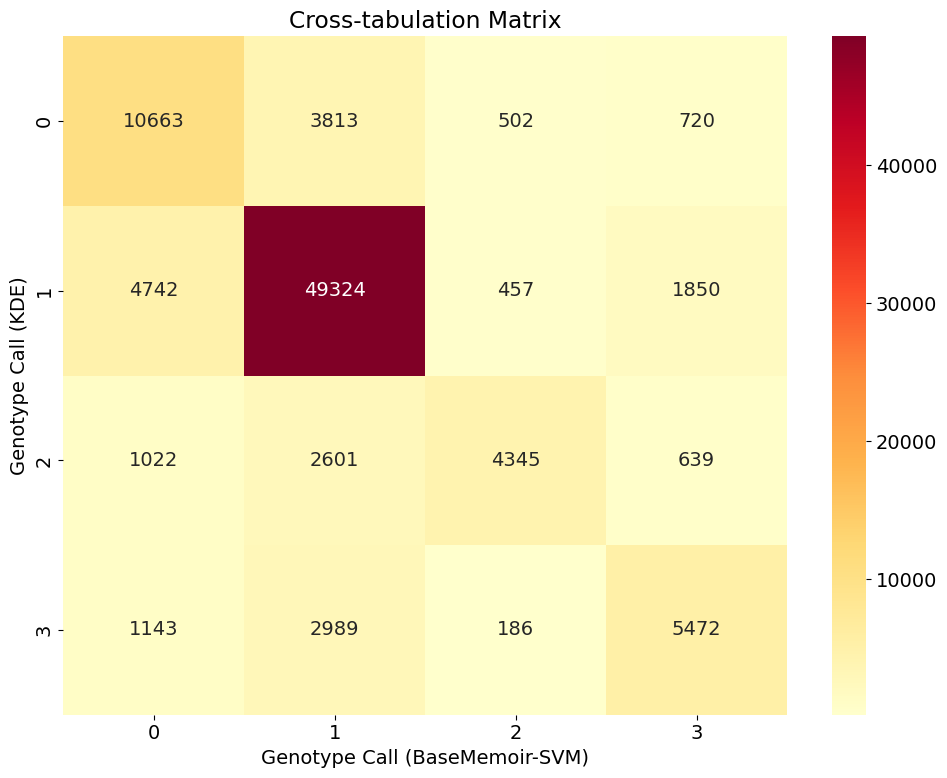

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 14})

#score_df['max_state'] = score_df['max_state'].replace({0: 1, 1: 0})
#score_df['maxpostprobstate'] = score_df['maxpostprobstate'].replace({0: 1, 1: 0})

score_df['max_state'] = score_df['max_state'].astype(int)
score_df['maxpostprobstate'] = score_df['maxpostprobstate'].astype(int)

# # Create a cross-tabulation of max_state and maxpostprobstate
confusion_matrix = pd.crosstab(score_df['max_state'], score_df['maxpostprobstate'])

# confusion_matrix
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlOrRd')

plt.title('Cross-tabulation Matrix')
plt.xlabel('Genotype Call (BaseMemoir-SVM)')
plt.ylabel('Genotype Call (KDE)')

plt.tight_layout()
# plt.show()
plt.savefig("/Users/gc3045/laml2_experiments/figures/baseMemoir_genotype_calls.pdf")

### Compute entropy

In [170]:
# Function to calculate entropy
def calculate_entropy(probabilities):
    # Avoid log(0) by adding a small epsilon
    epsilon = 1e-15
    return -np.sum(probabilities * np.log2(probabilities + epsilon))


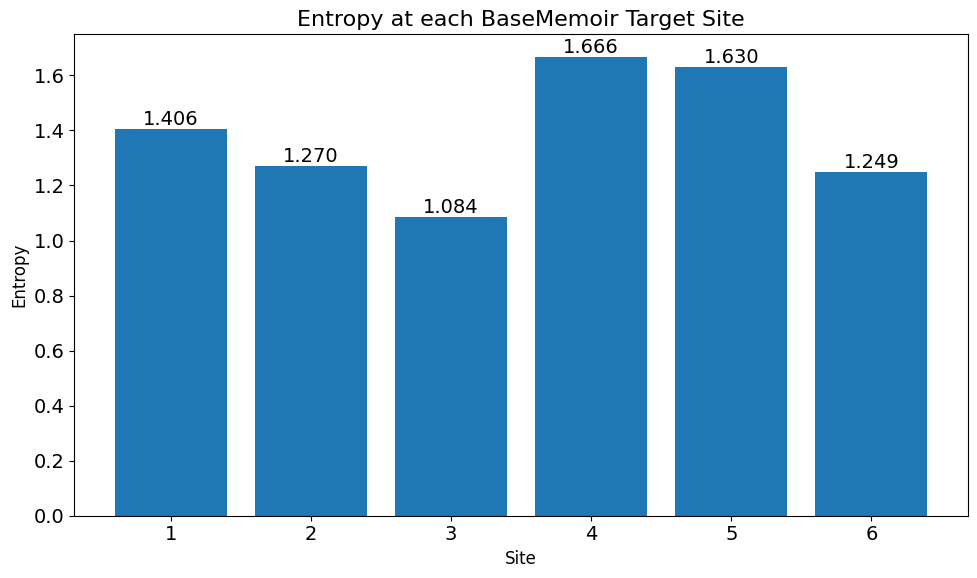

In [171]:
import matplotlib.pyplot as plt

num_sites = 6
num_states = 4

site_entropies = []
for site in range(num_sites):
    # prob_mats_export[i, k*6:(k+1)*6]
    site_data = np.array([prob_mats_export[:,site], prob_mats_export[:,site+6], prob_mats_export[:,site+12], prob_mats_export[:,site+18] ])
    # calculate entropy across the states, 
    # averaged over all cells for each site
    site_entropy = calculate_entropy(site_data.mean(axis=1))
    site_entropies.append(site_entropy)
    
# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, num_sites + 1), site_entropies)
plt.title("Entropy at each BaseMemoir Target Site", fontsize=16)
plt.xlabel("Site", fontsize=12)
plt.ylabel("Entropy", fontsize=12)
plt.xticks(range(1, num_sites + 1))

# Add value labels on top of each bar
for i, v in enumerate(site_entropies):
    plt.text(i + 1, v, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
# plt.show()
plt.savefig("/Users/gc3045/laml2_experiments/figures/baseMemoir_site_entropy.pdf")

In [172]:
site_data.shape

(4, 15078)

In [173]:
import matplotlib.pyplot as plt 
import seaborn as sns

num_sites = 6
num_states = 4

avg_probs = np.zeros((num_sites, num_states))
for site in range(num_sites):
    site_data = np.array([
        prob_mats_export[:, site], # prob of state1 in each cell
        prob_mats_export[:, site+6], # prob of state2 in each cell
        prob_mats_export[:, site+12], # prob of state3 in each cell
        prob_mats_export[:, site+18] # prob of state4 in each cell
    ])
    max_state = np.argmax(site_data, axis=0)
    print(max_state) # vector 
    for state in np.unique(max_state):
        # Select cells where this state is the max
        cells_with_max = np.where(state == max_state)
        cells_with_max_val = site_data[state, cells_with_max]
        if len(cells_with_max_val) > 0:
            # Calculate average probability for these cells
            avg_probs[site, state] = np.mean(cells_with_max_val)
        else:
            avg_probs[site, state] = 0  # or np.nan if you prefer
    
avg_probs = avg_probs.T



[0 1 0 ... 1 1 0]
[3 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 3 ... 3 1 1]
[0 0 0 ... 1 1 0]
[1 1 1 ... 1 1 1]


In [174]:
avg_probs.shape

(4, 6)

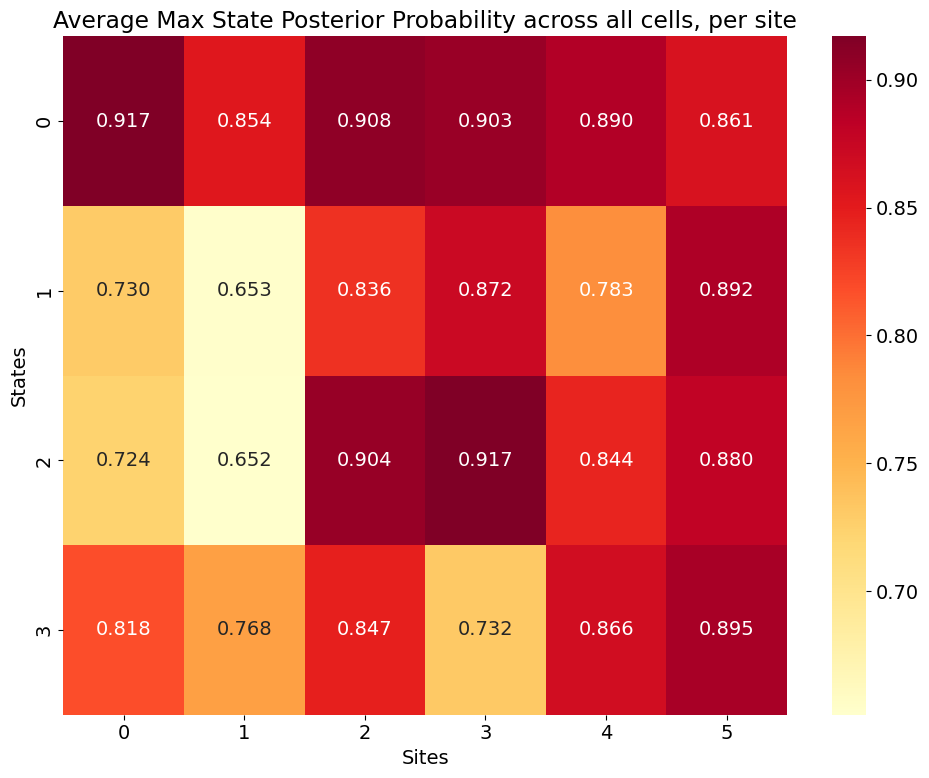

In [175]:
new_avg_probs = np.zeros((4, 6))

# make font bigger

new_avg_probs[1] = avg_probs[0]  # State 1 remains as is
new_avg_probs[0] = avg_probs[1]  # State 2 becomes 0
new_avg_probs[2] = avg_probs[2]  # State 3 becomes 2
new_avg_probs[3] = avg_probs[3]  # State 4 becomes 3


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(new_avg_probs, annot=True, cmap='YlOrRd', fmt='.3f')

plt.title('Average Max State Posterior Probability across all cells, per site')
plt.xlabel('Sites')
plt.ylabel('States')
plt.xticks(np.arange(num_sites) + 0.5, range(0, num_sites))
plt.yticks(np.arange(num_states) + 0.5, range(0, num_states))

plt.tight_layout()
# plt.show()
plt.savefig("/Users/gc3045/laml2_experiments/figures/baseMemoir_site_probs.pdf")

Save the score_df as a lookup table, concatenated with the metadata

In [176]:
score_df_take = score_df.iloc[:, :5]
score_df_take

,state_0,state_1,state_2,state_3,max_state
0,1.132963e-10,5.995518e-18,6.091644e-19,1.705798e-69,0
1,1.399712e-13,1.999991e-17,1.332736e-19,4.175912e-14,0
2,6.889248e-19,1.881959e-11,4.426716e-16,6.129712e-13,1
3,7.138131e-29,1.603485e-14,5.265846e-16,1.032066e-32,1
4,2.280929e-14,1.890085e-35,1.780643e-15,9.252995e-19,0
...,...,...,...,...,...
90463,8.622557e-16,1.193092e-09,2.735424e-25,5.046400e-13,1
90464,9.779429e-19,1.290770e-07,4.104718e-24,3.953570e-19,1
90465,2.539236e-19,3.868813e-09,2.037911e-11,4.178015e-19,1
90466,1.162256e-14,1.636422e-23,2.815185e-100,1.009738e-12,3


In [177]:
# save KDE with 0 and 1 remapped
# save the result_df with 0 and 1 remapped, and with max_state adjusted

In [178]:
import pickle

for key in new_kde_dict.keys():
    # Save the model
    with open(f'kde_model_state{key}.pkl', 'wb') as f:
        pickle.dump(kde, f)

    # Load the model later
    #with open('kde_model.pkl', 'rb') as f:
    #    loaded_kde = pickle.load(f)

In [179]:
result_df = pd.concat([df, score_df_take], axis=1)

result_df

,integration_barcode,cell_number,dot_number,position_number,site_index,feature_1,feature_2,feature_3,feature_4,feature_5,...,baseMem_svm_state_1,baseMem_svm_state_2,baseMem_svm_state_3,maxpostprobstate_at_site,maxpostprobval_at_site,state_0,state_1,state_2,state_3,max_state
0,1.0,1.0,57.0,1.0,1.0,10.984123,8.966101,10.065734,7.761319,6.930495,...,0.001505,0.087431,0.001574,0.0,0.909489,1.132963e-10,5.995518e-18,6.091644e-19,1.705798e-69,0
1,1.0,1.0,57.0,1.0,2.0,10.861515,8.056427,8.837100,11.704025,6.620073,...,0.000201,0.004905,0.644814,3.0,0.644814,1.399712e-13,1.999991e-17,1.332736e-19,4.175912e-14,0
2,1.0,1.0,57.0,1.0,3.0,7.203406,10.781100,7.641564,8.145260,2.833213,...,0.940735,0.046383,0.001963,1.0,0.940735,6.889248e-19,1.881959e-11,4.426716e-16,6.129712e-13,1
3,1.0,1.0,57.0,1.0,4.0,6.924612,10.706117,7.285507,7.573017,2.484907,...,0.942045,0.032878,0.001690,1.0,0.942045,7.138131e-29,1.603485e-14,5.265846e-16,1.032066e-32,1
4,1.0,1.0,57.0,1.0,5.0,10.343901,8.582606,10.566330,10.339126,6.424869,...,0.004091,0.311299,0.117325,0.0,0.567286,2.280929e-14,1.890085e-35,1.780643e-15,9.252995e-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90463,9.0,9.0,649.0,9.0,2.0,6.735780,10.173782,7.367709,8.249836,3.091042,...,0.979866,0.000210,0.007064,1.0,0.979866,8.622557e-16,1.193092e-09,2.735424e-25,5.046400e-13,1
90464,9.0,9.0,649.0,9.0,3.0,6.753438,10.685995,7.773174,7.355002,2.639057,...,0.987961,0.000639,0.001116,1.0,0.987961,9.779429e-19,1.290770e-07,4.104718e-24,3.953570e-19,1
90465,9.0,9.0,649.0,9.0,4.0,5.176150,10.653606,8.835792,5.726848,0.000000,...,0.966041,0.032212,0.000274,1.0,0.966041,2.539236e-19,3.868813e-09,2.037911e-11,4.178015e-19,1
90466,9.0,9.0,649.0,9.0,5.0,10.038106,8.198089,5.505332,10.433056,6.224558,...,0.022644,0.000001,0.313143,0.0,0.664211,1.162256e-14,1.636422e-23,2.815185e-100,1.009738e-12,3


In [180]:

# Save the DataFrame to a CSV file with a header
result_df.to_csv('baseMemoir_result_df.csv', index=False)

### Remapping and Reformatting

In [196]:
result_df = pd.read_csv('baseMemoir_result_df.csv')
result_df

,integration_barcode,cell_number,dot_number,position_number,site_index,feature_1,feature_2,feature_3,feature_4,feature_5,...,baseMem_svm_state_1,baseMem_svm_state_2,baseMem_svm_state_3,maxpostprobstate_at_site,maxpostprobval_at_site,state_0,state_1,state_2,state_3,max_state
0,1.0,1.0,57.0,1.0,1.0,10.984123,8.966101,10.065734,7.761319,6.930495,...,0.001505,0.087431,0.001574,0.0,0.909489,1.132963e-10,5.995518e-18,6.091644e-19,1.705798e-69,0
1,1.0,1.0,57.0,1.0,2.0,10.861515,8.056427,8.837100,11.704025,6.620073,...,0.000201,0.004905,0.644814,3.0,0.644814,1.399712e-13,1.999991e-17,1.332736e-19,4.175912e-14,0
2,1.0,1.0,57.0,1.0,3.0,7.203406,10.781100,7.641564,8.145260,2.833213,...,0.940735,0.046383,0.001963,1.0,0.940735,6.889248e-19,1.881959e-11,4.426716e-16,6.129712e-13,1
3,1.0,1.0,57.0,1.0,4.0,6.924612,10.706117,7.285507,7.573017,2.484907,...,0.942045,0.032878,0.001690,1.0,0.942045,7.138131e-29,1.603485e-14,5.265846e-16,1.032066e-32,1
4,1.0,1.0,57.0,1.0,5.0,10.343901,8.582606,10.566330,10.339126,6.424869,...,0.004091,0.311299,0.117325,0.0,0.567286,2.280929e-14,1.890085e-35,1.780643e-15,9.252995e-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90463,9.0,9.0,649.0,9.0,2.0,6.735780,10.173782,7.367709,8.249836,3.091042,...,0.979866,0.000210,0.007064,1.0,0.979866,8.622557e-16,1.193092e-09,2.735424e-25,5.046400e-13,1
90464,9.0,9.0,649.0,9.0,3.0,6.753438,10.685995,7.773174,7.355002,2.639057,...,0.987961,0.000639,0.001116,1.0,0.987961,9.779429e-19,1.290770e-07,4.104718e-24,3.953570e-19,1
90465,9.0,9.0,649.0,9.0,4.0,5.176150,10.653606,8.835792,5.726848,0.000000,...,0.966041,0.032212,0.000274,1.0,0.966041,2.539236e-19,3.868813e-09,2.037911e-11,4.178015e-19,1
90466,9.0,9.0,649.0,9.0,5.0,10.038106,8.198089,5.505332,10.433056,6.224558,...,0.022644,0.000001,0.313143,0.0,0.664211,1.162256e-14,1.636422e-23,2.815185e-100,1.009738e-12,3


In [197]:
result_df[['baseMem_svm_state_0', 'baseMem_svm_state_1']]

,baseMem_svm_state_0,baseMem_svm_state_1
0,0.909489,0.001505
1,0.350080,0.000201
2,0.010919,0.940735
3,0.023386,0.942045
4,0.567286,0.004091
...,...,...
90463,0.012860,0.979866
90464,0.010284,0.987961
90465,0.001472,0.966041
90466,0.664211,0.022644


In [198]:
result_df['maxpostprobstate_at_site'].value_counts()


maxpostprobstate_at_site
1.0    58727
0.0    17570
3.0     8681
2.0     5490
Name: count, dtype: int64

In [199]:
result_df['max_state'].value_counts()


max_state
1    56373
0    15698
3     9790
2     8607
Name: count, dtype: int64

In [200]:
# remap
# 1. Rename columns and switch their order


# Rename state_0 to a temporary name and state_1 to the previous site's state_0
result_df = result_df.rename(columns={
    f'baseMem_svm_state_0': 'temp_state',
    f'baseMem_svm_state_1': f'baseMem_svm_state_0'
})
# Rename temporary name to state_1
result_df = result_df.rename(columns={'temp_state': f'baseMem_svm_state_1'})

cols = result_df.columns.tolist()
state_0_index = cols.index(f'baseMem_svm_state_0')
state_1_index = cols.index(f'baseMem_svm_state_1')

cols[state_0_index], cols[state_1_index] = cols[state_1_index], cols[state_0_index]
result_df = result_df[cols]

result_df = result_df.rename(columns={'state_0': 'temp_state', 'state_1': 'state_0'})
result_df = result_df.rename(columns={'temp_state': 'state_1'})
result_df

,integration_barcode,cell_number,dot_number,position_number,site_index,feature_1,feature_2,feature_3,feature_4,feature_5,...,baseMem_svm_state_1,baseMem_svm_state_2,baseMem_svm_state_3,maxpostprobstate_at_site,maxpostprobval_at_site,state_1,state_0,state_2,state_3,max_state
0,1.0,1.0,57.0,1.0,1.0,10.984123,8.966101,10.065734,7.761319,6.930495,...,0.909489,0.087431,0.001574,0.0,0.909489,1.132963e-10,5.995518e-18,6.091644e-19,1.705798e-69,0
1,1.0,1.0,57.0,1.0,2.0,10.861515,8.056427,8.837100,11.704025,6.620073,...,0.350080,0.004905,0.644814,3.0,0.644814,1.399712e-13,1.999991e-17,1.332736e-19,4.175912e-14,0
2,1.0,1.0,57.0,1.0,3.0,7.203406,10.781100,7.641564,8.145260,2.833213,...,0.010919,0.046383,0.001963,1.0,0.940735,6.889248e-19,1.881959e-11,4.426716e-16,6.129712e-13,1
3,1.0,1.0,57.0,1.0,4.0,6.924612,10.706117,7.285507,7.573017,2.484907,...,0.023386,0.032878,0.001690,1.0,0.942045,7.138131e-29,1.603485e-14,5.265846e-16,1.032066e-32,1
4,1.0,1.0,57.0,1.0,5.0,10.343901,8.582606,10.566330,10.339126,6.424869,...,0.567286,0.311299,0.117325,0.0,0.567286,2.280929e-14,1.890085e-35,1.780643e-15,9.252995e-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90463,9.0,9.0,649.0,9.0,2.0,6.735780,10.173782,7.367709,8.249836,3.091042,...,0.012860,0.000210,0.007064,1.0,0.979866,8.622557e-16,1.193092e-09,2.735424e-25,5.046400e-13,1
90464,9.0,9.0,649.0,9.0,3.0,6.753438,10.685995,7.773174,7.355002,2.639057,...,0.010284,0.000639,0.001116,1.0,0.987961,9.779429e-19,1.290770e-07,4.104718e-24,3.953570e-19,1
90465,9.0,9.0,649.0,9.0,4.0,5.176150,10.653606,8.835792,5.726848,0.000000,...,0.001472,0.032212,0.000274,1.0,0.966041,2.539236e-19,3.868813e-09,2.037911e-11,4.178015e-19,1
90466,9.0,9.0,649.0,9.0,5.0,10.038106,8.198089,5.505332,10.433056,6.224558,...,0.664211,0.000001,0.313143,0.0,0.664211,1.162256e-14,1.636422e-23,2.815185e-100,1.009738e-12,3


In [201]:
cols = result_df.columns.tolist()
state_0_index = cols.index('state_0')
state_1_index = cols.index('state_1')
cols[state_0_index], cols[state_1_index] = cols[state_1_index], cols[state_0_index]
result_df = result_df[cols]

In [202]:
result_df

,integration_barcode,cell_number,dot_number,position_number,site_index,feature_1,feature_2,feature_3,feature_4,feature_5,...,baseMem_svm_state_1,baseMem_svm_state_2,baseMem_svm_state_3,maxpostprobstate_at_site,maxpostprobval_at_site,state_0,state_1,state_2,state_3,max_state
0,1.0,1.0,57.0,1.0,1.0,10.984123,8.966101,10.065734,7.761319,6.930495,...,0.909489,0.087431,0.001574,0.0,0.909489,5.995518e-18,1.132963e-10,6.091644e-19,1.705798e-69,0
1,1.0,1.0,57.0,1.0,2.0,10.861515,8.056427,8.837100,11.704025,6.620073,...,0.350080,0.004905,0.644814,3.0,0.644814,1.999991e-17,1.399712e-13,1.332736e-19,4.175912e-14,0
2,1.0,1.0,57.0,1.0,3.0,7.203406,10.781100,7.641564,8.145260,2.833213,...,0.010919,0.046383,0.001963,1.0,0.940735,1.881959e-11,6.889248e-19,4.426716e-16,6.129712e-13,1
3,1.0,1.0,57.0,1.0,4.0,6.924612,10.706117,7.285507,7.573017,2.484907,...,0.023386,0.032878,0.001690,1.0,0.942045,1.603485e-14,7.138131e-29,5.265846e-16,1.032066e-32,1
4,1.0,1.0,57.0,1.0,5.0,10.343901,8.582606,10.566330,10.339126,6.424869,...,0.567286,0.311299,0.117325,0.0,0.567286,1.890085e-35,2.280929e-14,1.780643e-15,9.252995e-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90463,9.0,9.0,649.0,9.0,2.0,6.735780,10.173782,7.367709,8.249836,3.091042,...,0.012860,0.000210,0.007064,1.0,0.979866,1.193092e-09,8.622557e-16,2.735424e-25,5.046400e-13,1
90464,9.0,9.0,649.0,9.0,3.0,6.753438,10.685995,7.773174,7.355002,2.639057,...,0.010284,0.000639,0.001116,1.0,0.987961,1.290770e-07,9.779429e-19,4.104718e-24,3.953570e-19,1
90465,9.0,9.0,649.0,9.0,4.0,5.176150,10.653606,8.835792,5.726848,0.000000,...,0.001472,0.032212,0.000274,1.0,0.966041,3.868813e-09,2.539236e-19,2.037911e-11,4.178015e-19,1
90466,9.0,9.0,649.0,9.0,5.0,10.038106,8.198089,5.505332,10.433056,6.224558,...,0.664211,0.000001,0.313143,0.0,0.664211,1.636422e-23,1.162256e-14,2.815185e-100,1.009738e-12,3


In [203]:
# 2. Replace values in maxpostprobstate_at_site column
result_df['maxpostprobstate_at_site'] = result_df['maxpostprobstate_at_site'].replace({0: 1, 1: 0})


In [204]:
result_df

,integration_barcode,cell_number,dot_number,position_number,site_index,feature_1,feature_2,feature_3,feature_4,feature_5,...,baseMem_svm_state_1,baseMem_svm_state_2,baseMem_svm_state_3,maxpostprobstate_at_site,maxpostprobval_at_site,state_0,state_1,state_2,state_3,max_state
0,1.0,1.0,57.0,1.0,1.0,10.984123,8.966101,10.065734,7.761319,6.930495,...,0.909489,0.087431,0.001574,1.0,0.909489,5.995518e-18,1.132963e-10,6.091644e-19,1.705798e-69,0
1,1.0,1.0,57.0,1.0,2.0,10.861515,8.056427,8.837100,11.704025,6.620073,...,0.350080,0.004905,0.644814,3.0,0.644814,1.999991e-17,1.399712e-13,1.332736e-19,4.175912e-14,0
2,1.0,1.0,57.0,1.0,3.0,7.203406,10.781100,7.641564,8.145260,2.833213,...,0.010919,0.046383,0.001963,0.0,0.940735,1.881959e-11,6.889248e-19,4.426716e-16,6.129712e-13,1
3,1.0,1.0,57.0,1.0,4.0,6.924612,10.706117,7.285507,7.573017,2.484907,...,0.023386,0.032878,0.001690,0.0,0.942045,1.603485e-14,7.138131e-29,5.265846e-16,1.032066e-32,1
4,1.0,1.0,57.0,1.0,5.0,10.343901,8.582606,10.566330,10.339126,6.424869,...,0.567286,0.311299,0.117325,1.0,0.567286,1.890085e-35,2.280929e-14,1.780643e-15,9.252995e-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90463,9.0,9.0,649.0,9.0,2.0,6.735780,10.173782,7.367709,8.249836,3.091042,...,0.012860,0.000210,0.007064,0.0,0.979866,1.193092e-09,8.622557e-16,2.735424e-25,5.046400e-13,1
90464,9.0,9.0,649.0,9.0,3.0,6.753438,10.685995,7.773174,7.355002,2.639057,...,0.010284,0.000639,0.001116,0.0,0.987961,1.290770e-07,9.779429e-19,4.104718e-24,3.953570e-19,1
90465,9.0,9.0,649.0,9.0,4.0,5.176150,10.653606,8.835792,5.726848,0.000000,...,0.001472,0.032212,0.000274,0.0,0.966041,3.868813e-09,2.539236e-19,2.037911e-11,4.178015e-19,1
90466,9.0,9.0,649.0,9.0,5.0,10.038106,8.198089,5.505332,10.433056,6.224558,...,0.664211,0.000001,0.313143,1.0,0.664211,1.636422e-23,1.162256e-14,2.815185e-100,1.009738e-12,3


In [205]:
# 3. Replace values in max_state column and rename it
result_df['max_state'] = result_df['max_state'].replace({0: 1, 1: 0})
result_df = result_df.rename(columns={'max_state': 'KDE_max_state'})


In [206]:
result_df

,integration_barcode,cell_number,dot_number,position_number,site_index,feature_1,feature_2,feature_3,feature_4,feature_5,...,baseMem_svm_state_1,baseMem_svm_state_2,baseMem_svm_state_3,maxpostprobstate_at_site,maxpostprobval_at_site,state_0,state_1,state_2,state_3,KDE_max_state
0,1.0,1.0,57.0,1.0,1.0,10.984123,8.966101,10.065734,7.761319,6.930495,...,0.909489,0.087431,0.001574,1.0,0.909489,5.995518e-18,1.132963e-10,6.091644e-19,1.705798e-69,1
1,1.0,1.0,57.0,1.0,2.0,10.861515,8.056427,8.837100,11.704025,6.620073,...,0.350080,0.004905,0.644814,3.0,0.644814,1.999991e-17,1.399712e-13,1.332736e-19,4.175912e-14,1
2,1.0,1.0,57.0,1.0,3.0,7.203406,10.781100,7.641564,8.145260,2.833213,...,0.010919,0.046383,0.001963,0.0,0.940735,1.881959e-11,6.889248e-19,4.426716e-16,6.129712e-13,0
3,1.0,1.0,57.0,1.0,4.0,6.924612,10.706117,7.285507,7.573017,2.484907,...,0.023386,0.032878,0.001690,0.0,0.942045,1.603485e-14,7.138131e-29,5.265846e-16,1.032066e-32,0
4,1.0,1.0,57.0,1.0,5.0,10.343901,8.582606,10.566330,10.339126,6.424869,...,0.567286,0.311299,0.117325,1.0,0.567286,1.890085e-35,2.280929e-14,1.780643e-15,9.252995e-19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90463,9.0,9.0,649.0,9.0,2.0,6.735780,10.173782,7.367709,8.249836,3.091042,...,0.012860,0.000210,0.007064,0.0,0.979866,1.193092e-09,8.622557e-16,2.735424e-25,5.046400e-13,0
90464,9.0,9.0,649.0,9.0,3.0,6.753438,10.685995,7.773174,7.355002,2.639057,...,0.010284,0.000639,0.001116,0.0,0.987961,1.290770e-07,9.779429e-19,4.104718e-24,3.953570e-19,0
90465,9.0,9.0,649.0,9.0,4.0,5.176150,10.653606,8.835792,5.726848,0.000000,...,0.001472,0.032212,0.000274,0.0,0.966041,3.868813e-09,2.539236e-19,2.037911e-11,4.178015e-19,0
90466,9.0,9.0,649.0,9.0,5.0,10.038106,8.198089,5.505332,10.433056,6.224558,...,0.664211,0.000001,0.313143,1.0,0.664211,1.636422e-23,1.162256e-14,2.815185e-100,1.009738e-12,3


In [207]:
# compare with value counts before remapping
result_df['maxpostprobstate_at_site'].value_counts()

# maxpostprobstate_at_site
# 1.0    58727
# 0.0    17570
# 3.0     8681
# 2.0     5490

maxpostprobstate_at_site
0.0    58727
1.0    17570
3.0     8681
2.0     5490
Name: count, dtype: int64

In [208]:
result_df['KDE_max_state'].value_counts()

# max_state
# 1    56373
# 0    15698
# 3     9790
# 2     8607

KDE_max_state
0    56373
1    15698
3     9790
2     8607
Name: count, dtype: int64

In [209]:
result_df.to_csv('baseMemoir_result_df_remapped.csv', index=False)

In [210]:
# count how many in each position

# Group by position_number and count unique cell_numbers
unique_cells_per_position = result_df.groupby('position_number')['cell_number'].nunique()
# If you want this as a DataFrame instead of a Series:
unique_cells_per_position_df = unique_cells_per_position.reset_index()
unique_cells_per_position_df.columns = ['position_number', 'unique_cell_count']

# Display the results
print(unique_cells_per_position_df)

    position_number  unique_cell_count
0               0.0                 33
1               1.0                 22
2               2.0                 35
3               3.0                 16
4               4.0                 26
5               5.0                 28
6               6.0                 17
7               7.0                 71
8               8.0                 50
9               9.0                 49
10             10.0                 40


In [211]:
# do unique cells show up in more than one position?

# Group by cell_number and count unique positions
cell_positions = result_df.groupby('cell_number')['position_number'].nunique()

# Identify cells that appear in more than one position
cells_in_multiple_positions = cell_positions[cell_positions > 1]

# Calculate statistics
total_cells = result_df['cell_number'].nunique()
cells_in_multiple_positions_count = len(cells_in_multiple_positions)
percentage = (cells_in_multiple_positions_count / total_cells) * 100

print(f"Total unique cells: {total_cells}")
print(f"Cells appearing in multiple positions: {cells_in_multiple_positions_count}")
print(f"Percentage of cells in multiple positions: {percentage:.2f}%")

# cell index mapped to number of positions it's associated with
print("\nCells in multiple positions:")
print(cells_in_multiple_positions)

Total unique cells: 73
Cells appearing in multiple positions: 55
Percentage of cells in multiple positions: 75.34%

Cells in multiple positions:
cell_number
1.0      8
2.0      8
3.0     11
4.0     10
5.0     11
6.0     11
7.0     11
8.0     11
9.0     11
10.0    11
11.0    11
12.0    11
13.0    11
14.0    10
15.0    10
16.0    11
17.0    10
18.0     9
19.0     9
20.0     9
21.0     9
22.0     8
23.0     9
24.0     8
25.0     8
26.0     8
27.0     6
28.0     7
29.0     6
30.0     6
31.0     6
32.0     6
33.0     6
34.0     6
35.0     6
36.0     4
37.0     4
38.0     4
39.0     4
40.0     4
41.0     3
42.0     3
43.0     3
44.0     3
45.0     3
46.0     3
47.0     2
48.0     3
49.0     3
50.0     3
51.0     3
52.0     2
54.0     2
55.0     2
56.0     2
Name: position_number, dtype: int64
